In [149]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [ ]:
# SET UP TOPOLOGY AND MOBILITY
# wnm = Fnm/Nm
# Pmn = Fmn / sum_m(Fmn)
# dmn = (1 - log(Pmn))
# Dmn = min(all path distances from n to m)


In [154]:
N = 200
G = nx.connected_watts_strogatz_graph(N,4,0.4,seed = 10)
#pos = nx.spring_layout(G)
#nx.draw(G,pos)
#plt.show()

In [155]:
POPs = []
Fs = []
for k in range(N):
    POPs.append(np.random.choice(range(90,190)))
    F = []
    for l in range(N):
        F.append(np.random.uniform(0,1))
    Fs.append(F)
    
Fmatr = np.multiply(np.array(Fs),nx.to_numpy_matrix(G))
Fmatr = (Fmatr + Fmatr.transpose())/2.0

W = np.zeros(np.shape(Fmatr))
for k in range(len(POPs)):
    for j in range(len(POPs)):
        W[j,k] = Fmatr[j,k]/float(POPs[k])
        
P = np.zeros(np.shape(Fmatr))
for k in range(len(POPs)):
    s = sum(Fmatr[:,k])
    for j in range(len(POPs)):
        P[j,k] = Fmatr[j,k]/float(s)

D = np.zeros(np.shape(P))
for k in range(len(POPs)):
    for j in range(len(POPs)):
        if P[j,k]>0:
            D[j,k] = 1. - np.log(P[j,k])

Deff = nx.all_pairs_dijkstra_path_length(nx.from_numpy_matrix(D))
Deffs = []
for e in Deff:
    Deffs.append([list(e[1].keys()),list(e[1].values())])
    
#plt.plot(Deffs[0][1])
#plt.show()

In [ ]:
# SET UP DYNAMICS
# dS = -a I S / N dt
# dI = a I S / N dt - b I dt
# dUn = sum_m( wnm Um - wmn Un)

# dj = a s j sig(j/eps) - b j + gam sum_m(Pmn(jm-jn))
# ds = -a s j sig(j/eps) + gam sum_m(Pmn(sm-sn))

In [156]:
j = np.zeros(len(POPs))
s = np.ones(len(POPs))
origin = np.random.choice(range(len(POPs)))
print(origin)
j[origin] = 0.1
s[origin] = 0.9

T = 1000
dt = 0.1
gam = 0.05
alph = 0.3
rec = 0.02

Inf = np.zeros((len(j),T))
Susc = np.zeros((len(j),T))
for t in range(T):
    jj = np.zeros(len(POPs))
    ss = np.zeros(len(POPs))
    for k in range(len(j)):
        mobj = 0
        mobs = 0
        for l in range(len(j)):
            mobj += P[l,k]*(j[l]-j[k])
            mobs += P[l,k]*(s[l]-s[k])
        jj[k] = j[k] + dt*alph*s[k]*j[k] - rec*j[k]*dt + gam*dt*mobj
        ss[k] = s[k] - dt*alph*s[k]*j[k] + gam*dt*mobs
    Inf[:,t] = jj
    Susc[:,t] = ss
    for k in range(len(j)):
        j[k] = jj[k]
        s[k] = ss[k]
        
#plt.figure()
#plt.plot(Inf[origin,:],label='Inf')
#plt.plot(Susc[origin,:],label='Susc')
#plt.legend()
#plt.show()

16


Origin is 16


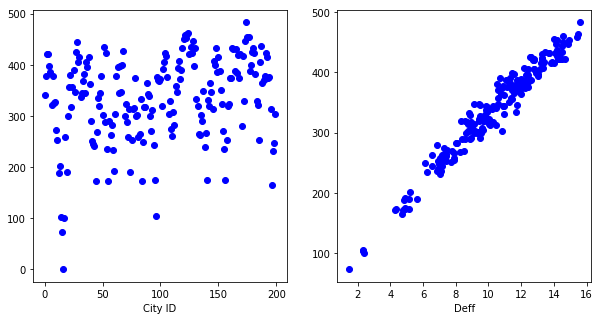

In [157]:
ToA = []
for k in range(len(Inf[:,t])):
    m = 0
    while Inf[k,m]<0.1:
        m += 1
    ToA.append(m)
print('Origin is {}'.format(origin))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(ToA,'bo')
plt.xlabel('City ID')
plt.subplot(122)
plt.plot(Deffs[origin][1][1:],[ToA[k] for k in Deffs[origin][0]][1:],'bo')
plt.xlabel('Deff')
plt.show()

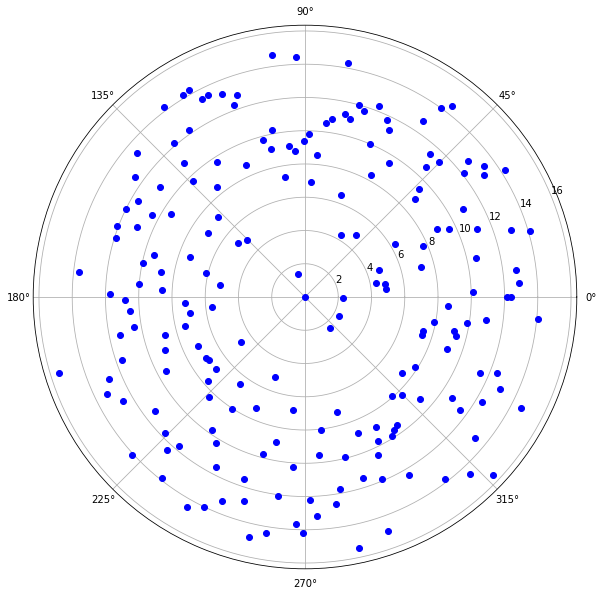

In [158]:
theta = np.random.permutation(np.linspace(0,2*np.pi,len(POPs)))
r = Deffs[origin][1]
plt.figure(figsize = (10,10))
plt.polar(theta,r,'bo')
plt.show()

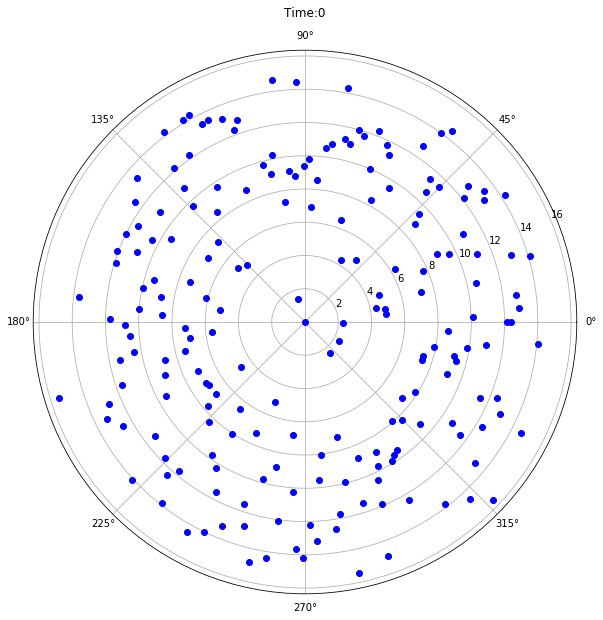

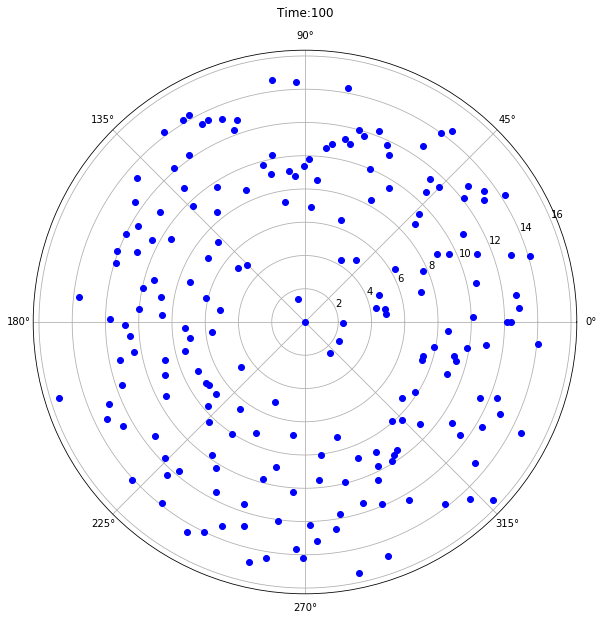

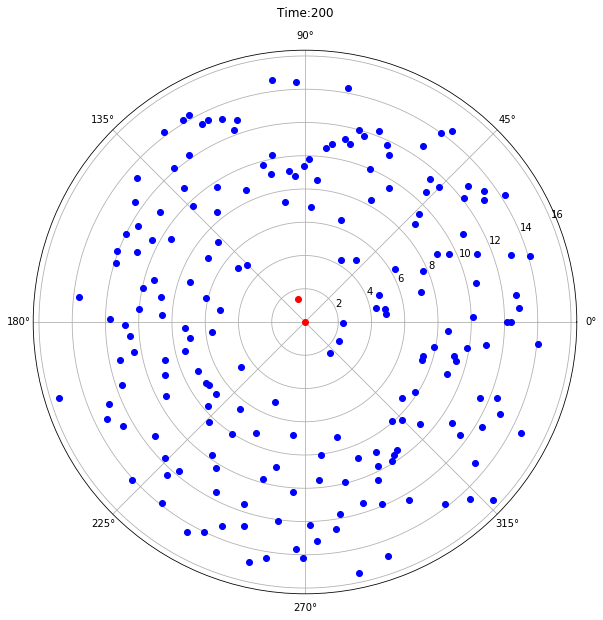

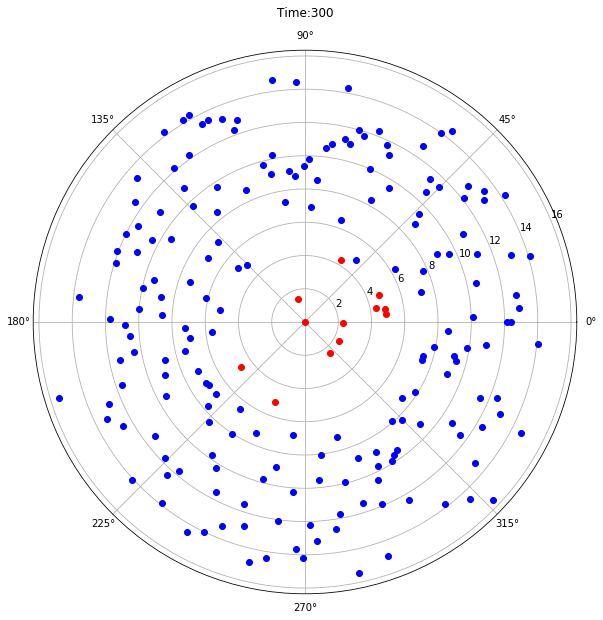

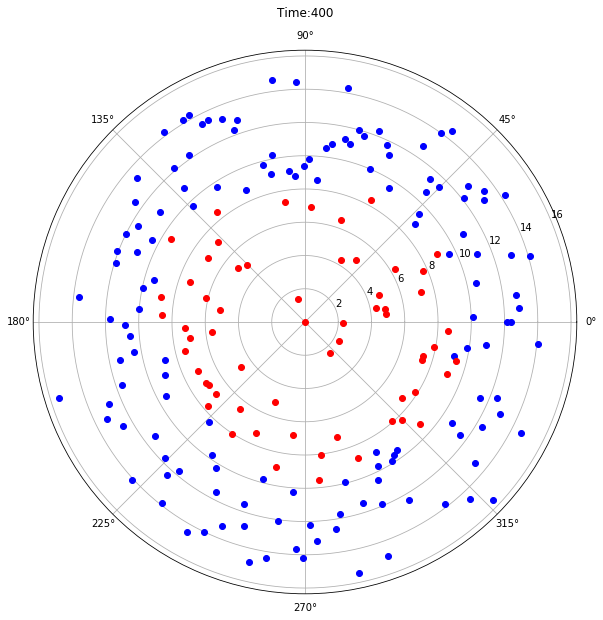

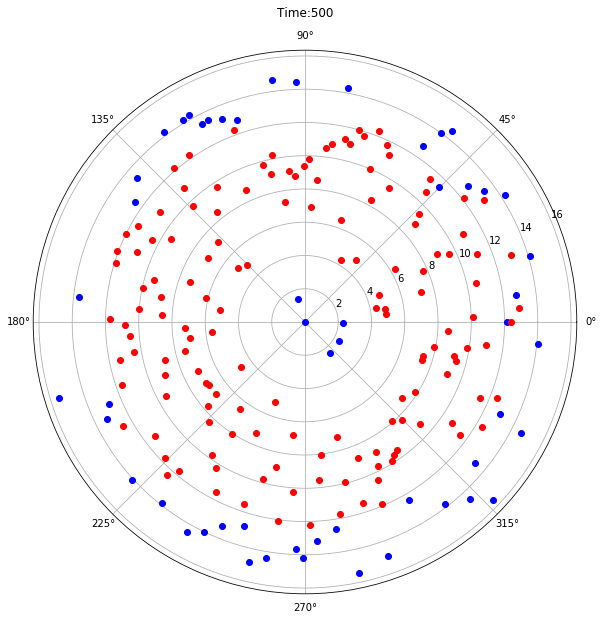

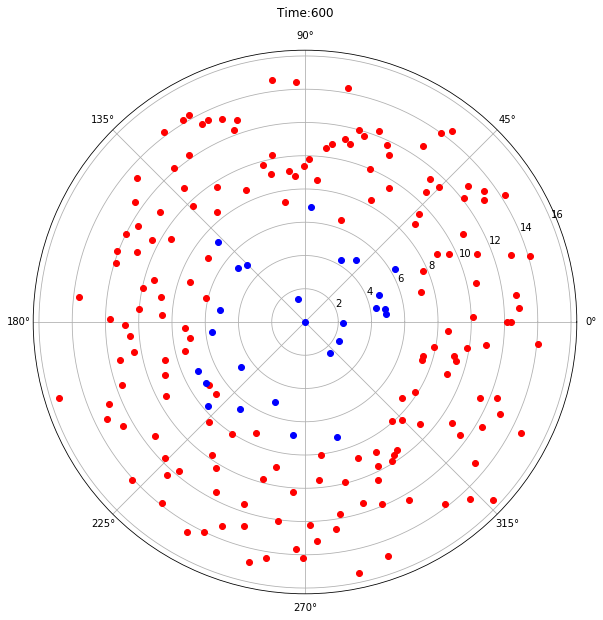

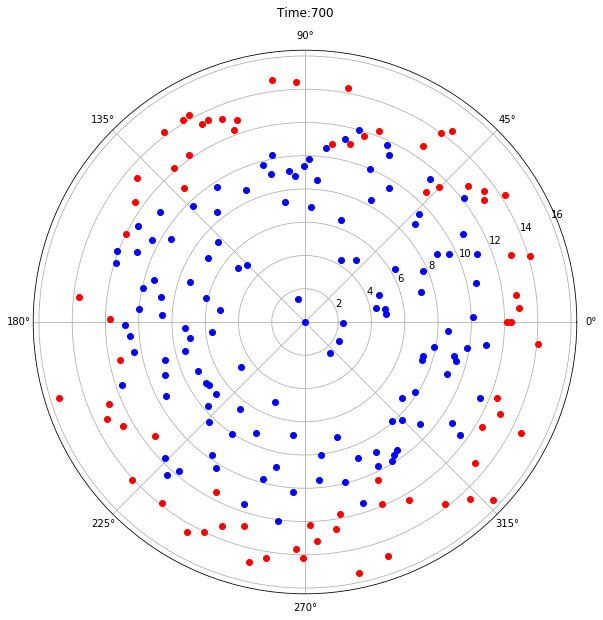

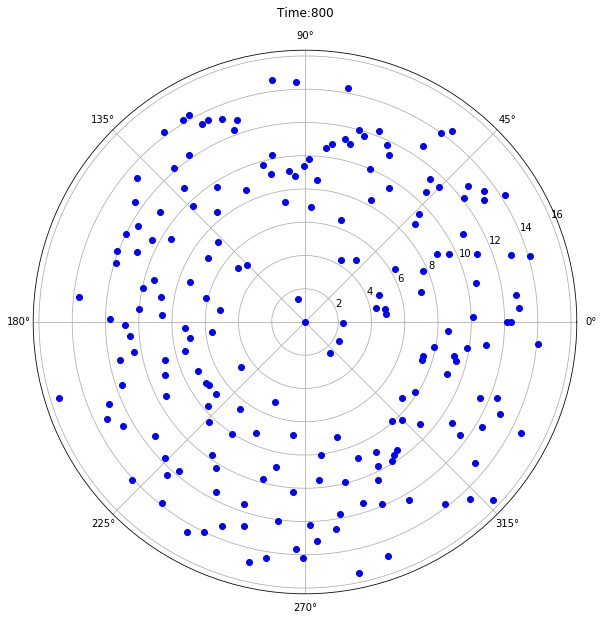

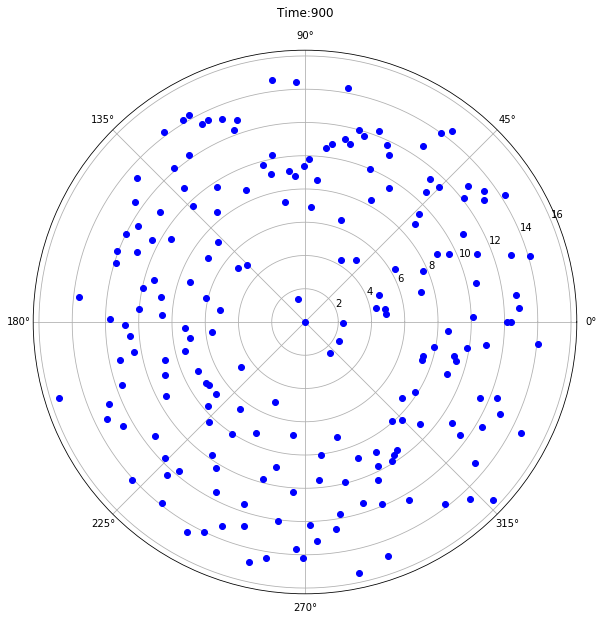

In [160]:
for Time in [0,100,200,300,400,500,600,700,800,900]:
    clr = np.array([Inf[k,Time]>0.6 for k in Deffs[origin][0]])
    r = Deffs[origin][1]
    plt.figure(figsize = (10,10))
    for k in range(len(clr)):
        if clr[k]:
            plt.polar(theta[k],r[k],'ro')
        else:
            plt.polar(theta[k],r[k],'bo')
    plt.title('Time:'+str(Time))
    plt.savefig('./Spread/Spread'+str(Time))